In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from scipy.stats import loguniform, randint, uniform
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
RANDOM_STATE = 710

In [3]:
bank = pd.read_csv("bank-full.csv", sep=";")
bank.y = bank.y.map({'yes':1, 'no':0})

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [6]:
bank.describe()
# include='all'

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [7]:
# drop rows with na
# bank.dropna()

# bank.isna().any()
# bank.isna().sum()
# bank.fillna()

In [8]:
for i in list(bank.columns):
    print(f"{i:<10}->  {bank[i].nunique():<5} unique values")
    

age       ->  77    unique values
job       ->  12    unique values
marital   ->  3     unique values
education ->  4     unique values
default   ->  2     unique values
balance   ->  7168  unique values
housing   ->  2     unique values
loan      ->  2     unique values
contact   ->  3     unique values
day       ->  31    unique values
month     ->  12    unique values
duration  ->  1573  unique values
campaign  ->  48    unique values
pdays     ->  559   unique values
previous  ->  41    unique values
poutcome  ->  4     unique values
y         ->  2     unique values


In [9]:
bank.job.value_counts(ascending=False)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [10]:
X = bank.drop(columns=["y", 'pdays', 'poutcome', 'day', 'month', 'campaign', 'previous', 'default', 'housing', 'contact'])
y = bank["y"]
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.3
                                                    , random_state=RANDOM_STATE
                                                    , stratify=y)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31647 entries, 20111 to 19059
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   balance    31647 non-null  int64 
 5   loan       31647 non-null  object
 6   duration   31647 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.9+ MB


<Axes: ylabel='Frequency'>

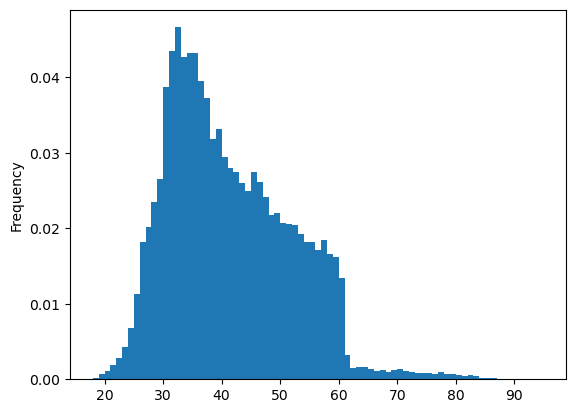

In [12]:
X_train['age'].plot(kind = 'hist', bins=77, density=True)

<Axes: ylabel='Frequency'>

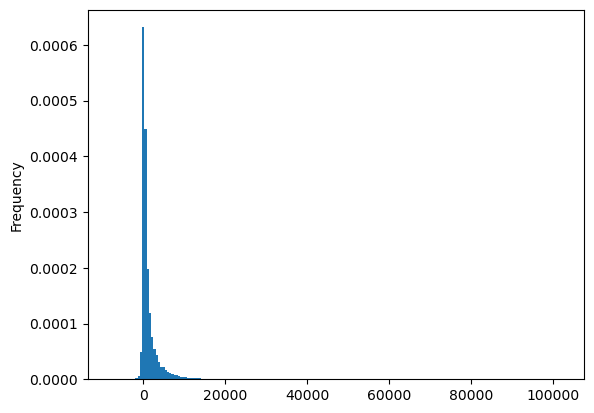

In [13]:
X_train['balance'].plot(kind = 'hist', bins=200, density=True)

<Axes: ylabel='Frequency'>

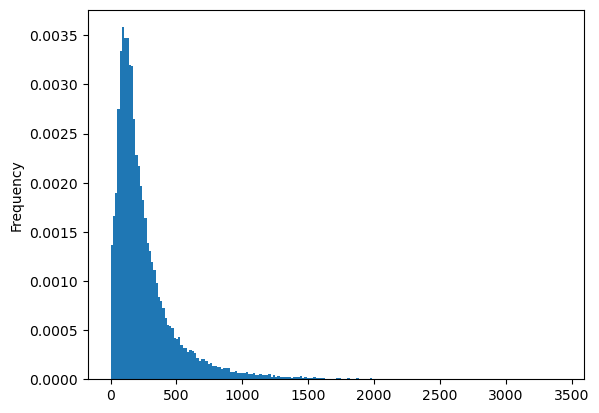

In [14]:
X_train['duration'].plot(kind = 'hist', bins=200, density=True)

#   preprocessing

In [15]:
num_cols = ['age', 'balance', 'duration']
ord_cols = ['education']
cat_cols = [col for col in X.columns if col not in num_cols and col not in ord_cols]
cat_cols


['job', 'marital', 'loan']

In [16]:
from sklearn.preprocessing import PolynomialFeatures
education_levels = ['tertiary', 'secondary', 'primary', 'unknown']
ordinal_transformer = OrdinalEncoder(categories=[education_levels], dtype=int)

numeric_transformer = make_pipeline(PolynomialFeatures(degree=1),StandardScaler())

binary_transformer = make_pipeline(OneHotEncoder(dtype=int, drop='if_binary'))

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [17]:
preprocessor = make_column_transformer(
        # (numeric_transformer, numeric_features),
        (ordinal_transformer, ord_cols),
        # ('binary', binary_transformer, binary_features),
        (categorical_transformer, cat_cols),
        # ('drop', 'passthrough', drop_features)
    remainder='passthrough'
    )

In [18]:
HGB_preprocessor = make_column_transformer(
        (numeric_transformer, num_cols),
        (ordinal_transformer, ord_cols),
        # ('binary', binary_transformer, binary_features),
        (categorical_transformer, cat_cols),
        # ('drop', 'passthrough', drop_features)
    remainder='passthrough'
    )

In [19]:
linear_preprocessor = make_column_transformer(
        (numeric_transformer, num_cols),
        (ordinal_transformer, ord_cols),
        # ('binary', binary_transformer, binary_features),
        (categorical_transformer, cat_cols),
        # ('drop', 'passthrough', drop_features)
    remainder='passthrough'
    )

In [20]:
baseline = make_pipeline(
    preprocessor,
    DummyClassifier()
)

baseline_result = pd.DataFrame(
    cross_validate(
        baseline,
        X_train,
        y_train,
        cv=10,
        scoring='roc_auc',
        return_train_score=True
    )
)
baseline_result.mean()

fit_time       0.020589
score_time     0.004347
test_score     0.500000
train_score    0.500000
dtype: float64

## RF

In [183]:
RF = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=RANDOM_STATE
                           ,max_depth=5)
)

RF_result = pd.DataFrame(
    cross_validate(
        RF,
        X_train,
        y_train,
        cv=10,
        scoring='roc_auc',
        return_train_score=True
    )
)
RF_result.mean()

fit_time       0.643362
score_time     0.012754
test_score     0.839674
train_score    0.848860
dtype: float64

In [184]:
RF.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['tertiary',
                                                                              'secondary',
                                                                              'primary',
                                                                              'unknown']],
                                                                 dtype=<class 'int'>),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'loan'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, random_state=710))])

In [185]:
len(RF.named_steps['randomforestclassifier'].estimators_)

100

## HGB

In [186]:
preprocessor.fit_transform(X_train).shape

(31647, 21)

In [187]:

HGB = HistGradientBoostingClassifier(random_state=RANDOM_STATE
                                   , categorical_features=ord_cols+cat_cols)


HGB_result = pd.DataFrame(
    cross_validate(
        HGB,
        X_train,
        y_train,
        cv=10,
        scoring='roc_auc',
        return_train_score=True
    )
)
HGB_result.mean()

fit_time       0.647481
score_time     0.008976
test_score     0.858895
train_score    0.895056
dtype: float64

# para_search

In [188]:
RF.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(categories=[['tertiary',
                                                              'secondary',
                                                              'primary',
                                                              'unknown']],
                                                 dtype=<class 'int'>),
                                  ['education']),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['job', 'marital', 'loan'])]),
 'randomforestclassifier': RandomForestClassifier(max_depth=5, random_state=710)}

In [189]:
param_dist = {
    "randomforestclassifier__n_estimators": [50, 100, 200],
    "randomforestclassifier__max_depth":[3, 5, 7, 10],
    "randomforestclassifier__max_features": ["sqrt", "log2"]
}


RF_grid_search = GridSearchCV(RF, 
                             param_dist, 
                             n_jobs=-1, 
                             cv=5,
                             scoring='roc_auc',
                             return_train_score=True
                            )

RF_grid_search.fit(X_train, y_train)

results_RF = pd.DataFrame({
    'mean_test_score': RF_grid_search.cv_results_['mean_test_score'],
    'std_test_score': RF_grid_search.cv_results_['std_test_score'],
    'mean_train_score': RF_grid_search.cv_results_['mean_train_score'],
    'std_train_score': RF_grid_search.cv_results_['std_train_score'],
    'params': RF_grid_search.cv_results_['params']}
)
results_RF

,mean_test_score,std_test_score,mean_train_score,std_train_score,params
0,0.816589,0.010530,0.823713,0.003629,"{'randomforestclassifier__max_depth': 3, 'rand..."
1,0.821719,0.010726,0.828137,0.001195,"{'randomforestclassifier__max_depth': 3, 'rand..."
2,0.825527,0.010260,0.832117,0.001249,"{'randomforestclassifier__max_depth': 3, 'rand..."
3,0.816589,0.010530,0.823713,0.003629,"{'randomforestclassifier__max_depth': 3, 'rand..."
4,0.821719,0.010726,0.828137,0.001195,"{'randomforestclassifier__max_depth': 3, 'rand..."
5,0.825527,0.010260,0.832117,0.001249,"{'randomforestclassifier__max_depth': 3, 'rand..."
6,0.833731,0.009516,0.845739,0.002447,"{'randomforestclassifier__max_depth': 5, 'rand..."
7,0.838975,0.008930,0.850274,0.001515,"{'randomforestclassifier__max_depth': 5, 'rand..."
8,0.839565,0.008366,0.850500,0.002341,"{'randomforestclassifier__max_depth': 5, 'rand..."
9,0.833731,0.009516,0.845739,0.002447,"{'randomforestclassifier__max_depth': 5, 'rand..."


In [190]:
RF_grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['tertiary',
                                                                              'secondary',
                                                                              'primary',
                                                                              'unknown']],
                                                                 dtype=<class 'int'>),
                                                  ['education']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'loan'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=710))])

In [191]:
RF_grid_search.best_index_

20

In [192]:
RF_grid_search.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 200}

In [193]:
RF_grid_search.cv_results_

{'mean_fit_time': array([0.43395128, 0.85379519, 1.76604347, 0.58986411, 0.88028288,
        1.85209055, 0.60558023, 1.22939706, 2.24758902, 0.66871209,
        1.1646595 , 2.41293139, 0.82390461, 1.42625346, 2.89750662,
        0.68568106, 1.39292679, 2.80509348, 1.10996251, 1.75714154,
        3.31970825, 0.95967059, 1.59411087, 2.65394292]),
 'std_fit_time': array([0.03367981, 0.03519819, 0.16221322, 0.11178379, 0.09709196,
        0.09722594, 0.03395954, 0.14966533, 0.12765932, 0.08196326,
        0.18074819, 0.14989741, 0.12696114, 0.14820562, 0.2512122 ,
        0.06238205, 0.08499458, 0.22931397, 0.11592371, 0.11166415,
        0.36310482, 0.10742265, 0.14911076, 0.20559259]),
 'mean_score_time': array([0.02089362, 0.03232598, 0.04994426, 0.02723136, 0.02842994,
        0.05380917, 0.02852445, 0.03668089, 0.08107629, 0.02846169,
        0.0386548 , 0.0754034 , 0.03797131, 0.05385957, 0.08666692,
        0.02907023, 0.04814625, 0.08963437, 0.04679947, 0.06508079,
        0.084696

In [194]:
param_dist = {
    # "l2_regularization": loguniform(1e-5, 1e2),
    "max_iter": randint(30, 200),
    "max_depth": randint(3, 20),
    
}

HGB_random_search = RandomizedSearchCV(HGB, 
                                   param_dist, 
                                   n_iter=100, 
                                   n_jobs=-1, 
                                   cv=5,
                                   scoring='roc_auc',
                                   return_train_score=True,
                                   random_state=RANDOM_STATE
                                  )

HGB_random_search.fit(X_train, y_train)

results_HGB = pd.DataFrame({
    'mean_test_score': HGB_random_search.cv_results_['mean_test_score'],
    'std_test_score': HGB_random_search.cv_results_['std_test_score'],
    'mean_train_score': HGB_random_search.cv_results_['mean_train_score'],
    'std_train_score': HGB_random_search.cv_results_['std_train_score'],
    'params': HGB_random_search.cv_results_['params']}
)
prediction = HGB_random_search.predict(X_train)



In [195]:
HGB_random_search.best_params_

{'max_depth': 3, 'max_iter': 99}

In [196]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, prediction)

0.8960091003886624

In [197]:
results_HGB.sort_values(by='mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,params
10,0.859689,0.004985,0.872768,0.001042,"{'max_depth': 3, 'max_iter': 99}"
99,0.859672,0.004963,0.872852,0.001062,"{'max_depth': 3, 'max_iter': 100}"
59,0.859671,0.005021,0.874678,0.001764,"{'max_depth': 3, 'max_iter': 142}"
15,0.859578,0.004888,0.875079,0.002095,"{'max_depth': 3, 'max_iter': 188}"
2,0.859551,0.005204,0.880259,0.001331,"{'max_depth': 4, 'max_iter': 97}"
...,...,...,...,...,...
17,0.856937,0.004744,0.899141,0.007527,"{'max_depth': 9, 'max_iter': 192}"
8,0.856937,0.004744,0.899141,0.007527,"{'max_depth': 9, 'max_iter': 113}"
92,0.856937,0.004744,0.899141,0.007527,"{'max_depth': 9, 'max_iter': 118}"
62,0.856937,0.004744,0.899141,0.007527,"{'max_depth': 9, 'max_iter': 199}"


In [198]:
accuracy_score(y_test, HGB_random_search.predict(X_test))

0.885579475081097

In [199]:
accuracy_score(y_test, RF_grid_search.predict(X_test))

0.8885284576820996

In [200]:
HGB.fit(X_train, y_train)
accuracy_score(y_test, HGB.predict(X_test))

0.886685343556473

               Model  Recall_score  Precision  f1_score  Area_under_curve
0  HGB_random_search      0.243226   0.523745  0.332186          0.852058
---------------------------------
              precision    recall  f1-score       support
0              0.906369  0.970694  0.937429  11977.000000
1              0.523745  0.243226  0.332186   1587.000000
accuracy       0.885579  0.885579  0.885579      0.885579
macro avg      0.715057  0.606960  0.634808  13564.000000
weighted avg   0.861602  0.885579  0.866615  13564.000000


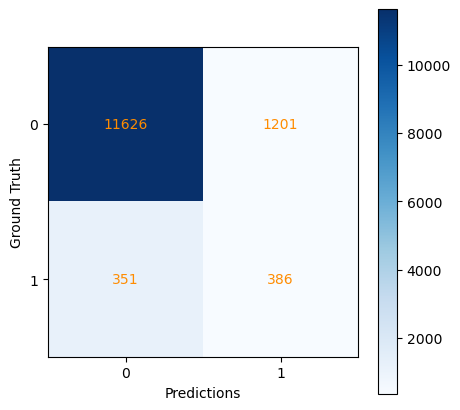

In [210]:
model_report(HGB_random_search, X_test, y_test, name='HGB_random_search')

In [213]:
print(classification_report(y_test,  HGB_random_search.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9064    0.9707    0.9374     11977
           1     0.5237    0.2432    0.3322      1587

    accuracy                         0.8856     13564
   macro avg     0.7151    0.6070    0.6348     13564
weighted avg     0.8616    0.8856    0.8666     13564



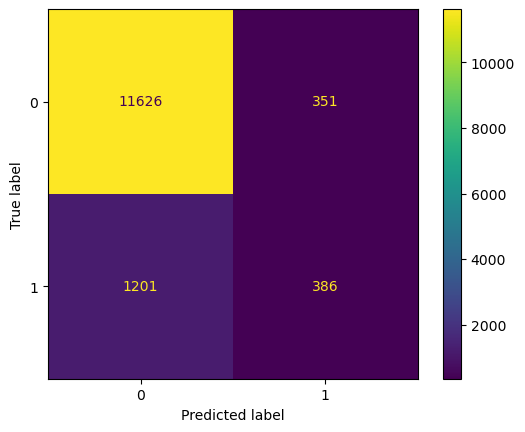

In [216]:
ConfusionMatrixDisplay.from_estimator(HGB_random_search, X_test, y_test)

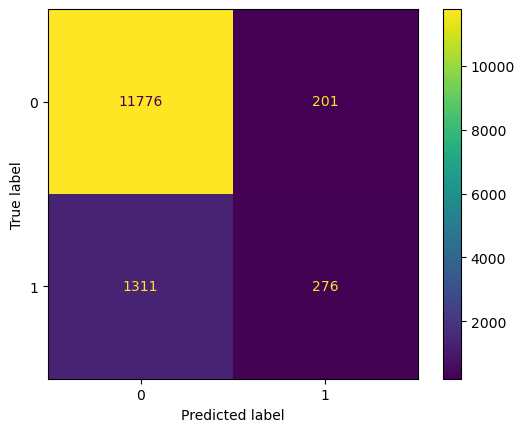

In [224]:
ConfusionMatrixDisplay.from_estimator(RF_grid_search, X_test, y_test)

In [226]:
print(classification_report(y_test,  RF_grid_search.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.8998    0.9832    0.9397     11977
           1     0.5786    0.1739    0.2674      1587

    accuracy                         0.8885     13564
   macro avg     0.7392    0.5786    0.6036     13564
weighted avg     0.8622    0.8885    0.8610     13564



(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Receiver Operating Characteristic'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
 array([0.00000000e+00, 8.34933623e-05, 8.34933623e-05, ...,
        9.99582533e-01, 9.99749520e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 6.30119723e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 0.8520583113012395)

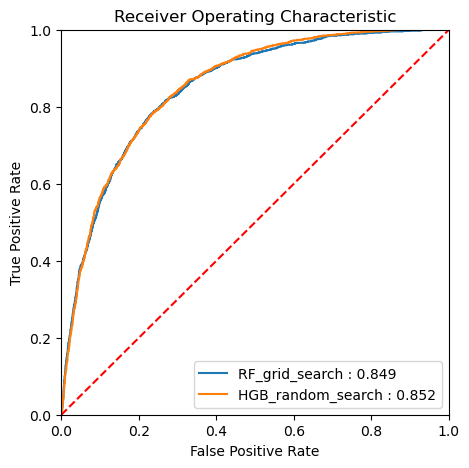

In [241]:
model_dict = {'RF_grid_search': RF_grid_search,
              'HGB_random_search': HGB_random_search}
compute_and_plot_roc_curve(X_test, y_test, **model_dict)

# utils

In [240]:
import matplotlib.pyplot as plt
from sklearn import metrics

def compute_roc_curve(model, testing_x, testing_y):
    """
    Compute the Receiver Operating Characteristic (ROC) curve.

    This function takes a machine learning model and test data as inputs.
    It computes the ROC curve using the model's probability predictions on the test data.

    Parameters:
    - model: A trained machine learning model that supports probability prediction.
    - testing_x: Test dataset (features).
    - testing_y: True labels for the test dataset.

    Returns:
    - fpr (array): An array containing the false positive rates.
    - tpr (array): An array containing the true positive rates.
    - roc_auc (float): The computed area under the ROC curve.

    """
    # Input validation
    if model is None:
        raise ValueError("No model provided. Please provide a machine learning model.")
    if not hasattr(model, 'predict_proba'):
        raise ValueError("The provided model does not support probability predictions.")
    if testing_x is None or testing_y is None:
        raise ValueError("Test data and labels must not be None.")
    
    # Compute ROC curve and ROC area
    predict_prob = model.predict_proba(testing_x)
    fpr, tpr, threshold = metrics.roc_curve(testing_y, predict_prob[:,1])
    roc_auc = metrics.auc(fpr, tpr)

    return fpr, tpr, roc_auc

def compute_and_plot_roc_curve(testing_x, testing_y, figsize=(5,5), **model_dict):
    
    # Define color cycle
    custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"
    ]
    colors = custom_colors[:len(model_dict)]

    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=figsize, facecolor="white")
    ax.set_title('Receiver Operating Characteristic')
    for idx, (model_name, model) in enumerate(model_dict.items()):
        fpr, tpr, roc_auc = compute_roc_curve(model, testing_x, testing_y)
        ax.plot(fpr, tpr, label='{} : {:0.3f}'.format(model_name, roc_auc), color=colors[idx])
    ax.legend(loc='lower right')
    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    
    return fig, ax, fpr, tpr, roc_auc

In [23]:
from lightgbm import LGBMClassifier

# Assuming num_cols, ord_cols, and cat_cols are already defined
numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = make_column_transformer(
    (numeric_transformer, num_cols),
    (ordinal_transformer, ord_cols),
    (categorical_transformer, cat_cols),
    remainder='passthrough'
)

# Define the LightGBM model pipeline
LGBM = make_pipeline(
    preprocessor,
    LGBMClassifier(random_state=RANDOM_STATE, verbose=-1)
)

# Perform cross-validation
LGBM_result = pd.DataFrame(
    cross_validate(
        LGBM,
        X_train,
        y_train,
        cv=10,
        scoring='roc_auc',
        return_train_score=True
    )
)
print(LGBM_result.mean())

# Parameter grid for GridSearchCV
param_dist = {
    "lgbmclassifier__n_estimators": [50, 100, 200],
    "lgbmclassifier__max_depth": [3, 5, 7, 10],
    "lgbmclassifier__num_leaves": [31, 62, 127]
}

# Grid search setup
LGBM_grid_search = GridSearchCV(LGBM, 
                                param_dist, 
                                n_jobs=-1, 
                                cv=5,
                                scoring='roc_auc',
                                return_train_score=True
                               )

# Fit the grid search
LGBM_grid_search.fit(X_train, y_train)

# Collect results
results_LGBM = pd.DataFrame({
    'mean_test_score': LGBM_grid_search.cv_results_['mean_test_score'],
    'std_test_score': LGBM_grid_search.cv_results_['std_test_score'],
    'mean_train_score': LGBM_grid_search.cv_results_['mean_train_score'],
    'std_train_score': LGBM_grid_search.cv_results_['std_train_score'],
    'params': LGBM_grid_search.cv_results_['params']
})
print(results_LGBM)

fit_time       0.318832
score_time     0.008775
test_score     0.859004
train_score    0.913533
dtype: float64
     mean_test_score  std_test_score  mean_train_score  std_train_score  \
0           0.828932        0.007915          0.834256     7.945283e-04   
1           0.828932        0.007915          0.834256     7.945283e-04   
2           0.828932        0.007915          0.834256     7.945283e-04   
3           0.835799        0.007432          0.841534     9.505714e-04   
4           0.835799        0.007432          0.841534     9.505714e-04   
..               ...             ...               ...              ...   
103         0.828775        0.005005          0.992802     6.955701e-03   
104         0.828869        0.006764          0.999914     1.741680e-05   
105         0.829139        0.007269          0.973119     2.104036e-02   
106         0.823964        0.007949          0.990697     1.859627e-02   
107         0.826823        0.006182          1.000000     2.209

In [25]:
results_LGBM.sort_values(by='mean_test_score',ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,params
44,0.860912,0.005557,0.880057,9.186921e-04,"{'lgbmclassifier__learning_rate': 0.1, 'lgbmcl..."
43,0.860912,0.005557,0.880057,9.186921e-04,"{'lgbmclassifier__learning_rate': 0.1, 'lgbmcl..."
42,0.860912,0.005557,0.880057,9.186921e-04,"{'lgbmclassifier__learning_rate': 0.1, 'lgbmcl..."
39,0.860471,0.005462,0.872495,9.286060e-04,"{'lgbmclassifier__learning_rate': 0.1, 'lgbmcl..."
41,0.860471,0.005462,0.872495,9.286060e-04,"{'lgbmclassifier__learning_rate': 0.1, 'lgbmcl..."
...,...,...,...,...,...
107,0.826823,0.006182,1.000000,2.209128e-08,"{'lgbmclassifier__learning_rate': 0.5, 'lgbmcl..."
96,0.826713,0.004165,0.965474,1.991309e-02,"{'lgbmclassifier__learning_rate': 0.5, 'lgbmcl..."
97,0.824427,0.008216,0.999367,1.118996e-04,"{'lgbmclassifier__learning_rate': 0.5, 'lgbmcl..."
98,0.823977,0.005850,0.999555,1.853444e-04,"{'lgbmclassifier__learning_rate': 0.5, 'lgbmcl..."


In [26]:
accuracy_score(y_test, LGBM_grid_search.predict(X_test))

0.8874963137717488